In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
import os

filename = "Dataset/file_gop_test(ver1).csv"

df = pd.read_csv(filename)

print("Number of rows:",len(df))
print(df.head())

Number of rows: 2341
   Voltage (V)  Temperature (°C)  Pressure (hPa)  Humidity (%)  Fire Alarm
0         0.56             29.88         1011.43          84.0           0
1         0.56             29.87         1011.43          84.0           0
2         0.55             29.87         1011.42          84.0           0
3         0.55             29.87         1011.43          84.0           0
4         0.54             29.87         1011.43          84.0           0


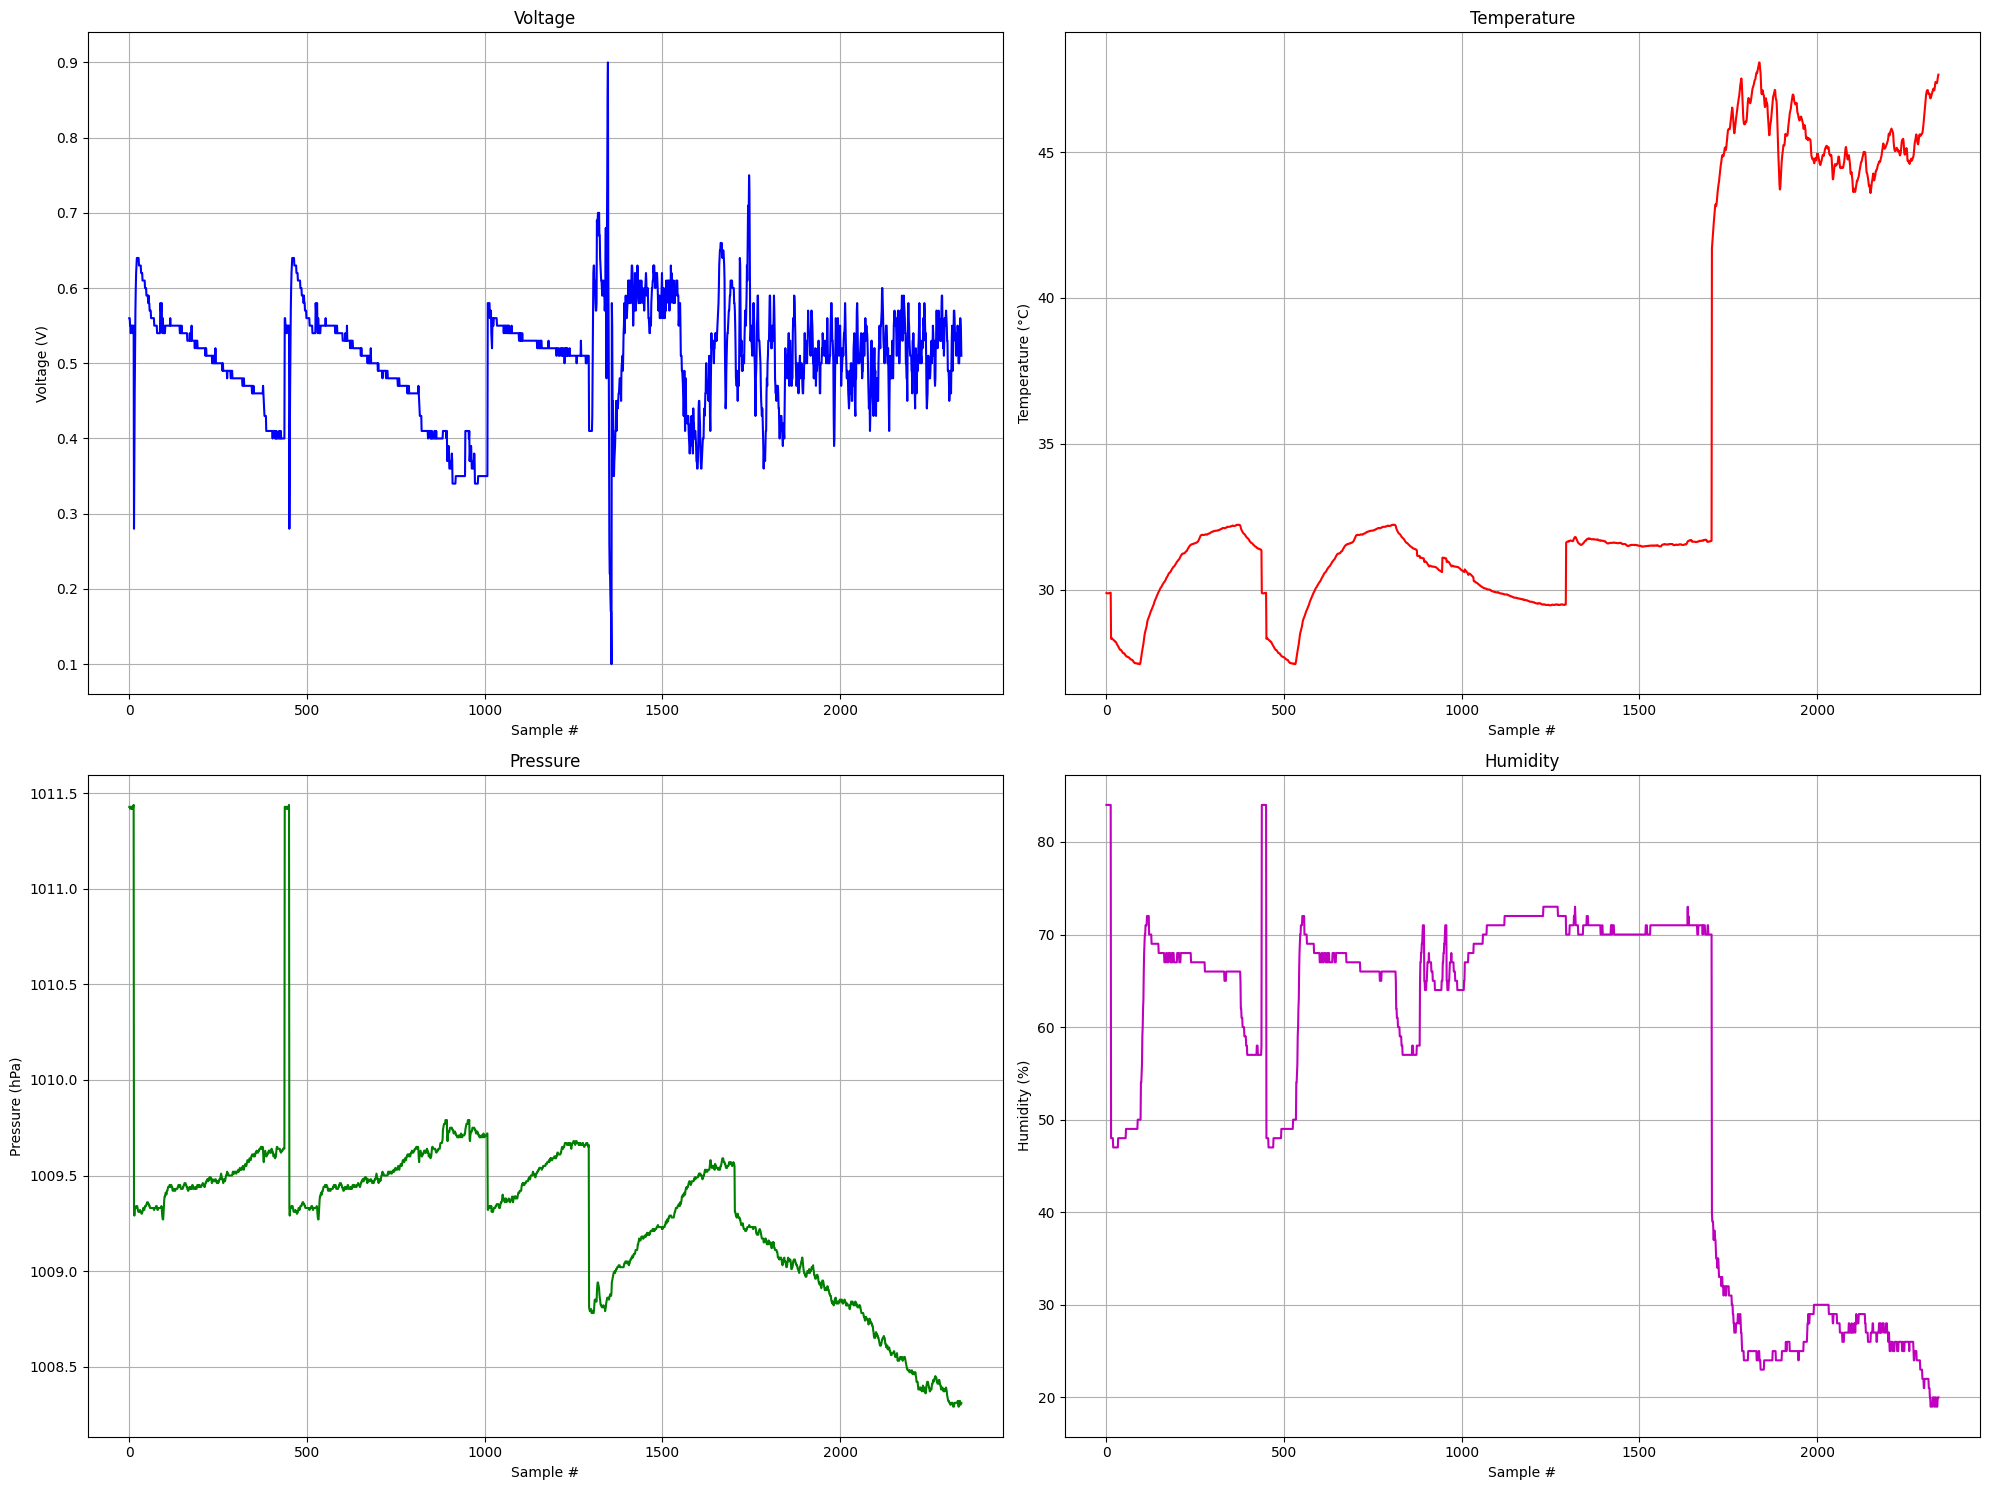

In [20]:
CO_value=df['Voltage (V)'].values
Temper_value=df['Temperature (°C)'].values
Pres_value=df['Pressure (hPa)'].values
Humid_value=df['Humidity (%)'].values

index=range(1,len(df)+1)

plt.figure(5, figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(index, CO_value, 'b-')
plt.title("Voltage")
plt.xlabel("Sample #")
plt.ylabel("Voltage (V)")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(index, Temper_value, 'r-')
plt.title("Temperature")
plt.xlabel("Sample #")
plt.ylabel("Temperature (°C)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(index, Pres_value, 'g-')
plt.title("Pressure")
plt.xlabel("Sample #")
plt.ylabel("Pressure (hPa)")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(index, Humid_value, 'm-')
plt.title("Humidity")
plt.xlabel("Sample #")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
NOTIFICE=["No_Alert","Alert"]

NUM_NOTIFICE=len(NOTIFICE)

ONE_HOT_ENCODED_NOTIFICE=np.eye(NUM_NOTIFICE)

print(ONE_HOT_ENCODED_NOTIFICE)


[[1. 0.]
 [0. 1.]]


In [22]:
# CHUAN HOA DU LIEU 
# Normalize the input data , between 0 to 1
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"Cột '{column}': min = {min_val}, max = {max_val}")
    

Cột 'Voltage (V)': min = 0.1, max = 0.9
Cột 'Temperature (°C)': min = 27.44, max = 48.08
Cột 'Pressure (hPa)': min = 1008.29, max = 1011.44
Cột 'Humidity (%)': min = 19.0, max = 84.0
Cột 'Fire Alarm': min = 0, max = 1


In [23]:

CO_value=df['Voltage (V)'].values
Temper_value=df['Temperature (°C)'].values
Pres_value=df['Pressure (hPa)'].values
Humid_value=df['Humidity (%)'].values

features=df[['Voltage (V)','Temperature (°C)','Pressure (hPa)','Humidity (%)']]
labels=df['Fire Alarm']
print(features)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

      Voltage (V)  Temperature (°C)  Pressure (hPa)  Humidity (%)
0            0.56             29.88         1011.43          84.0
1            0.56             29.87         1011.43          84.0
2            0.55             29.87         1011.42          84.0
3            0.55             29.87         1011.43          84.0
4            0.54             29.87         1011.43          84.0
...           ...               ...             ...           ...
2336         0.53             47.37         1008.32          19.0
2337         0.56             47.44         1008.30          19.0
2338         0.55             47.54         1008.30          20.0
2339         0.54             47.62         1008.31          20.0
2340         0.51             47.66         1008.31          20.0

[2341 rows x 4 columns]


In [25]:
from sklearn.model_selection import train_test_split

def create_windows(data, labels, window_size=60):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])  # Cửa sổ 60 giây
        y.append(labels[i + window_size])  # Nhãn tại thời điểm sau cửa sổ
    return np.array(X), np.array(y)

window_size = 60  # Kích thước cửa sổ thời gian
X, y = create_windows(features_scaled, labels.values, window_size)

# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:

# Xây dựng mô hình LSTM
model = models.Sequential([
    layers.Input(shape=(window_size, X.shape[2])),  # Shape: (60, 4) - 60 timesteps, 4 đặc trưng
    layers.LSTM(64, return_sequences=True),  # Lớp LSTM đầu tiên
    layers.LSTM(32),                         # Lớp LSTM thứ hai
    layers.Dense(16, activation='relu'),     # Lớp Dense trung gian
    layers.Dense(1, activation='sigmoid')    # Lớp đầu ra dự đoán xác suất (0 hoặc 1)
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trainning 
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.7807 - loss: 0.5123 - val_accuracy: 0.8904 - val_loss: 0.3171
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9218 - loss: 0.2255 - val_accuracy: 0.9425 - val_loss: 0.1733
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9216 - loss: 0.2299 - val_accuracy: 0.9370 - val_loss: 0.2304
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9351 - loss: 0.2056 - val_accuracy: 0.9616 - val_loss: 0.1339
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9505 - loss: 0.1532 - val_accuracy: 0.8164 - val_loss: 0.5480
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8674 - loss: 0.3343 - val_accuracy: 0.9425 - val_loss: 0.1552
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9224 - loss: 0.2064 - val_accuracy: 0.9534 - val_loss: 0.1356
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9529 - loss: 0.1243 - val_accuracy: 0.9753 - 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9832 - loss: 0.0738
Test Loss: 0.05422676354646683, Test Accuracy: 0.9868708848953247


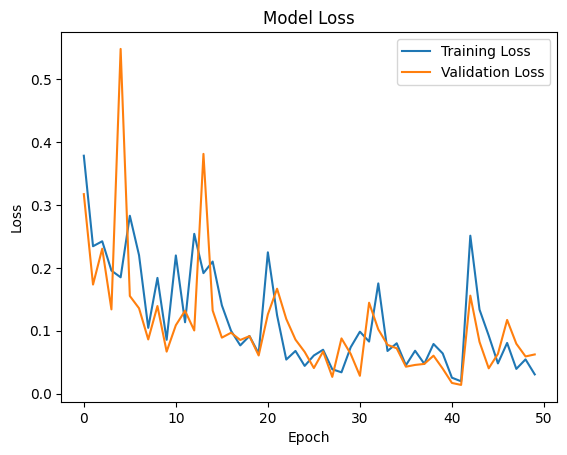

In [27]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Tối ưu hóa mô hình
tflite_model = converter.convert()

# Lưu mô hình TFLite
with open("CODetect.tflite", "wb") as f:
    f.write(tflite_model)



INFO:tensorflow:Assets written to: C:\Users\Bao\AppData\Local\Temp\tmpqml65yme\assets


INFO:tensorflow:Assets written to: C:\Users\Bao\AppData\Local\Temp\tmpqml65yme\assets


Saved artifact at 'C:\Users\Bao\AppData\Local\Temp\tmpqml65yme'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 60, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2578965678992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2578736676304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095870864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579069852880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095871056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095869904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095870480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095869712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095871440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2579095872016: TensorSpec(shape=(), dtype=tf.resource, name=None)


ConverterError: Variable constant folding is failed. Please consider using enabling `experimental_enable_resource_variables` flag in the TFLite converter object. For example, converter.experimental_enable_resource_variables = True<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_1/lstm_1/TensorArrayV2_1@__inference_function_31526"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_31577"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: loc(callsite(callsite(fused["TensorListReserve:", "sequential_1/lstm_1/TensorArrayV2_1@__inference_function_31526"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_31577"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False


In [29]:
# Kiểm tra kích thước mô hình TFLite
basic_model_size = os.path.getsize("CODetect.tflite")
print("Model is %d bytes" % basic_model_size)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'CODetect.tflite'

In [ ]:
# Hàm chuyển đổi hex thành mảng C
def hex_to_c_array(hex_data, var_name):
    c_str = ''
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        hex_str = format(val, '#04x')
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)
    c_str += '\n ' + ' '.join(hex_array) + '\n};\n\n'
    c_str += '#endif //' + var_name.upper() + '_H'
    return c_str

# Ghi mô hình TFLite thành file C
c_model_name = 'CODetect_model'
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))



In [30]:
# Lưu mô hình Keras
model.save('lstm_model.h5')

In [31]:
from tensorflow.keras.models import load_model

model = load_model("lstm_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,627 (119.64 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)